# Week 2 Lab: So where do all those reference genomes come from anyway? (Sequence assembly)

## Part 1 (40 pts)

Reminder, you can work with your classmates! And feel free to use the internet to help you.

<font color="red">**REMINDER**: We will have our first quiz at the start of the next lab section. The quiz will cover what we have learned in the first five lectures and the first lab session. The exercises notebook for this week contains quiz review questions. We have also posted example quiz questions from previous years on Canvas.</font>

Skills covered: genome size estimation, sequence assembly, command line one-liners, managing computational resources

### Intro

Today, you will explore using kmer count histograms to estimate the size of a sequenced *E. coli* strain and compare your result to existing software packages for performing this task. Next time, you will assemble the sequencing reads into a (semi) complete genome and evaluate the quality of the resulting sequence.

Today we will focus on an Illumina whole genome sequencing dataset from an E. coli sample. The dataset has paired-end reads with an average insert size of 215.4 bp (+/- 10.6bp). Reads are 100bp each.

Fastq files can be found in the `week2` directory:
```shell
ls /datasets/cs185-sp21-A00-public/week2/
```

You should see `shortfrag_1.fq`, `shortfrag_2.fq`, which are the files we will use today. There are additional files in that directory that we'll be looking at next lab session.

## 1. Inspecting reads with fasqtc

First, open up a terminal and create a `week2` directory in your home directory. `cd` into it and work out of there for today.

**Question 1 (2 pts)**: Recall from lab 1 how we used the `fastqc` tool to examine the quality of our reads as a preprocesing step. Apply `fastqc` to the two fastq files from the "shortfrag" dataset. Paste the exact command(s) you used to do so in the variable `fastqc_cmd` below.

In [2]:
fastqc_cmd = """
fastqc -o . shortfrag_1.fq shortfrag_2.fq
"""

# YOUR CODE HERE
#raise NotImplementedError()

In [3]:
"""Basic checks on the commands"""
assert("fastqc" in fastqc_cmd)
assert("shortfrag_1.fq" in fastqc_cmd)
assert("shortfrag_2.fq" in fastqc_cmd)

**Question 2 (2 pts)**: Do you see any concerning things (red X's) in the fastqc output? Which of the following categories failed fastqc's checks?

* A: Basic Statistics
* B: Per-base sequence quality
* C: Per sequence quality scores
* D: Per base sequence content
* E: Overrepresented sequences
* F: Both B and D

Set the variable `q2` to your answer below.

In [6]:
q2 = "B" # Set to "A", "B", "C", "D", "E", or "F"

# YOUR CODE HERE
#raise NotImplementedError()

In [7]:
"""Basic check on the answer"""
assert(q2 in ["A","B","C","D","E","F"])


## 2. Trimming reads for quality control

Before we move forward with genome size estimation, let's try to address the quality control issues flagged by `fastqc`. We'll be using a new tool to help with this.

`sickle` is a tool for trimming low quality ends of reads. It uses a sliding window trimming algorithm, where a small window slides along the sequence, starting from one end, cutting off sequence until the average quality is above a user specified threshold, then the window keeps going until the average quality drops below that threshold, and cuts off any sequence past that point.

First, to learn about `sickle`, type `sickle pe` at the command line.

You can specify both the quality threshold and a length threshold, which will discard any sequences that are shorter than a certain length after trimming. The defaults for both of these values are 20. Run sickle on your data with the default settings, remembering to specify the full paths to the fastq files in the public folder. Below is an example command.

```shell
sickle pe \
    -f file_1.fq \
    -r file_2.fq \
    -t sanger \
    -o ~/week2/shortfrag_trimmed_1.fq \
    -p ~/week2/shortfrag_trimmed_2.fq \
    -s ~/week2/shortfrag_singletons.fq
```

This command should all be on one line. To make it more readable it is broken up into multiple lines. A `\` means the command is continued on the next line. Note the paths given above are not real and are just meant as examples. 

You’ll notice that there are 3 output files (`-o`, `-p`, and `-s`). The first two are the trimmed forward and reverse reads, where BOTH the forward and its matching reverse read passed the trimming filter. The singletons file contains reads where one read passed the trimming filter, but its partner did not. The reads that do not pass are not output.

**Question 3 (3 pts):** Run `sickle pe` to trim the `shortfrag` library using default parameters. Be sure to write the output files (`-o`, `-p`, and `-s` files) to your `~/week2` directory. 

Your command should create output files:
* `~/week2/shortfrag_trimmed_1.fq` 
* `~/week2/shortfrag_trimmed_2.fq` 
* `~/week2/shortfrag_singletons.fq`

This will take a couple minutes. You can go on to the next part while you wait.

<blockquote>
**UNIX TIP**: If a command is taking a long time to run, and you want to close your computer, you can use `nohup` to run it in the background. See example below:
</blockquote>

```shell
nohup sickle pe .... &
```

This will write the output that would have printed to the screen to `nohup.out`. You can use `ls -ltrh` in the output directory to make sure the file sizes keep growing and see "human readable" filesizes in terms of gigabytes, megabytes, etc. 

**3.1 (1 pt)**: Paste the exact command(s) you used to run `sickle` in the variable `sickle_cmd` below.

**3.2 (1 pt)**: What is the size of the output file `~/week2/shortfrag_trimmed_1.fq` in gigabytes? Set the variable `trimmed1_size` to your answer.

**3.3 (1 pt)**: What is the size of the output file `~/week2/shortfrag_singletons.fq` in megabytes? Set the variable `singletons_size` to your answer.

In [23]:
!echo "cp ~/week2/shortfrag_1.fq" $PWD

cp ~/week2/shortfrag_q.fq /home/n4wilson/lab2-spring21


In [24]:
!echo "cp ~/week2/shortfrag_2.fq " $PWD

cp ~/week2/shortfrag_2.fq  /home/n4wilson/lab2-spring21


In [12]:
sickle_cmd = """
cd ~/week2
sickle pe -f shortfrag_1.fq -r shortfrag_2.fq -t sanger -o shortfrag_trimmed_1.fq -p shortfrag_trimmed_2.fq -s shortfrag_singletons.fq
"""
#Note: I copied the fq files into ~/week2
trimmed1_size = 2.8 # set to size of ~/week2/shortfrag_trimmed_1.fq in GB
singletons_size = 64 # set to the size of ~/week2/shortfrag_singletons.fq in MB

# YOUR CODE HERE
#raise NotImplementedError()

In [13]:
assert("sickle pe" in sickle_cmd)
assert("sanger" in sickle_cmd)


In [14]:
assert(trimmed1_size > 2 and trimmed1_size < 3)
assert(type(trimmed1_size)==float)


In [15]:
assert(singletons_size > 50 and singletons_size < 70)


**Question 4 (3 pts):** Rerun `fastqc` on the trimmed dataset. Paste the exact command(s) you used to do so in the variable `fastqc_cmd2` below. Set the variable `issues_remaining` to `True` if there are still categories flagged by fastqc, and write in a comment what those are. Otherwise, set `issues_remaining` to `False.

In [16]:
fastqc_cmd2 = """
fastqc -o . shortfrag_trimmed_1.fq shortfrag_trimmed_2.fq
"""

issues_remaining = False # Set to True or False. If you set to True, write in a comment what issues you still see

# YOUR CODE HERE
#raise NotImplementedError()

In [17]:
"""Basic checks on fastqc command"""
assert("fastqc" in fastqc_cmd2)


In [18]:
assert(issues_remaining in [True, False])


## 3. Generating and visualizing the kmer distribution

We'll use the trimmed "shortfrag" dataset to first count k-mers in our data to generate kmer count distributions similar to in the exercises. For this purpose it's ok to only analyze the forward fragment (your trimmed version of `shortfrag_1.fq`).

**Jellyfish** is a kmer counting program that will count the frequency of all possible k-mers of a given length in our data.

We will use two subcommands. `jellyfish count` counts kmers and creates a hash table. 

* `-m` specifies the kmer length
* `-C` tells it to ignore directionality (it treats each read the same as its reverse complement)
* `-s` is an initial estimate for the size of the hash table jellyfish uses. Let's set to 100M (100 million).
* `-o` specifies the name of the output file.

`jellyfish histo` computes a histogram of kmer count occurrences. You can use the two tools to create a histogram file. e.g.:

```shell
jellyfish count -m 18 -C -s 100M -o output.jf input.fq
jellyish histo output.jf > output.histo
```

Note the `>` symbol means put the output of the previous command into the specified file. If you don't use `>` it will output the results to standard output (your terminal screen).

**Question 5 (2 pts):** Run `jellyfish count` on the trimmed `shortfrag_1.fq` file using a kmer size of 18. Then use `jellyfish histo` to create a histogram file (we assume you named this `shortfrag.histo` below). Paste the commands you used below in the variable `jellyfish_cmds`. Set `histo_size` to the size in kilobytes of your output histogram file.

(This might take a couple minutes for this command to run.)

In [19]:
jellyfish_cmds = """

jellyfish count -m 18 -C -s 100M -o output.jf shortfrag_trimmed_1.fq
jellyfish histo output.jf > shortfrag.histo

"""

histo_size = 20 # set to the size of your output file e.g. shortfrag.histo

# YOUR CODE HERE
#raise NotImplementedError()

In [20]:
"""Basic checks on the command"""
assert("jellyfish count" in jellyfish_cmds)
assert("jellyfish histo" in jellyfish_cmds)
assert("-m 18" in jellyfish_cmds)

In [21]:
"""Check output file size"""
assert(histo_size > 15 and histo_size < 25)


You can inspect the histogram output using the UNIX `cat` command, which we saw last week:

```shell
cat shortfrag.histo
```

You should see two columns: the first gives the number of times a kmer was seen. The second gives the number of kmers seen that many times. So, for example, the first line gives the number of kmers seen exactly once. 

**Question 6 (3 pts):** Complete the function `PlotKmerHistogram` below to read in the histo file and plot the kmer count histogram. (The x-axis represents column 1 in the `.histo` file, or number of occurrences, and the y-axis is given by column 2, or number of kmers.) Hint: you should see a big spike at 1 and a bell curve further to the right. You might want to play with the variables `max_xval` and `max_yval` to make your visualization more informative by zooming in on the most important region. Without setting those you might have some pretty extreme x- and y-value data points dominating your plot.

**IMPORTANT NOTE**: When we grade your notebook, we will not have access to your home directories. So for any code that will directly read in a file, like the cell for plotting below, we ask that you first copy the file to the same directory as this notebook. **If you do not do this you may lose points since we won't have access to your file**. To get the file to this directory copy the output of the Jupyter Notebook cell below into your terminal. 

You'll know if this didn't work if the plotting cell breaks with a FileNotFound error.

In [22]:
!echo "cp ~/week2/shortfrag.histo " $PWD

cp ~/week2/shortfrag.histo  /home/n4wilson/lab2-spring21


Populating the interactive namespace from numpy and matplotlib
13789063


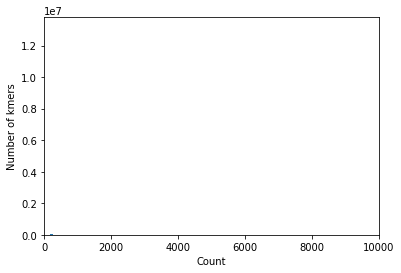

In [47]:
%pylab inline
import os

def PlotKmerHistogram(histofile, plot=True):
    """ Plot a histogram of the kmer counts
    
    Parameters
    ----------
    histofile : str
       Path to a histogram file from jellyfish and 
    plot : bool
       If set to False, don't output the plot. Used for tests
       
    Returns
    -------
    kmer_counts : dict of int -> int 
       Dictionary with key=count, value=num kmers seen that many times
    """
    max_xval = None
    max_yval = None
    kmer_counts = {} # Dictionary of count -> number of kmers
    # Read the histofile
    # Use its contents to update kmer_counts
    # You also will need to set max_xval and max_yval to something appropriate
    # YOUR CODE HERE
    #raise NotImplementedError()
    with open("shortfrag.histo", "r") as f:
        for line in f:
            line = line.strip()
            xval = int(line.split(" ")[0])
            yval = int(line.split(" ")[1])
            kmer_counts[xval] = yval
    max_xval = max(kmer_counts.keys())
    max_yval = max(kmer_counts.values())
    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.bar(kmer_counts.keys(), kmer_counts.values())
        ax.set_xlabel("Count")
        ax.set_ylabel("Number of kmers")
        if max_xval is not None: ax.set_xlim(left=0, right=max_xval)
        if max_yval is not None: ax.set_ylim(bottom=0, top=max_yval)
    return kmer_counts # return so we can check it!

PlotKmerHistogram("shortfrag.histo");

In [43]:
"""Check PlotKmerHistogram actually runs"""
kmer_counts = PlotKmerHistogram("shortfrag.histo", plot=False);

In [44]:
"""Check things about kmer_counts"""
kmer_counts = PlotKmerHistogram("shortfrag.histo", plot=False)
assert(len(kmer_counts.keys())==2731)

In [45]:
"""Check some values in kmer_counts"""
kmer_counts = PlotKmerHistogram("shortfrag.histo", plot=False)
assert(kmer_counts[1] == 13789063)


## 4. Estimating genome size from the kmer distribution

Now we will use the kmer distribution to estimate the size of our E. coli strain. Look back to the exercises to see how we derived the formula for genome size:

$$ G \approx \frac{\texttt{Total num. kmers observed}}{\texttt{Kmer coverage (M)}} $$

**Question 7 (1pt):** First, let's figure out $M$, the average kmer coverage. Recall this is the point where our kmer histogram peaks (ignoring the big spike of error kmers on the left). Figure out the peak by eyeballing the histogram and report your estimate for $M$ below. Set the variable `peak_guess` below to your guess for where the peak is.

In [48]:
peak_guess = 200 # Set to your guess. it can be approximate. This is based on eyeballing the plot above

# YOUR CODE HERE
#raise NotImplementedError()

In [49]:
"""Basic checks"""
assert(peak_guess > 100 and peak_guess < 300)


**Question 8 (3 pts):** Now complete the functions `EstimateValley` and `EstimateM` below to get a precise estimate of the first valley and peak location after removing errorenous kmers. The first valley is the point where kmer counts start increasing. The peak location ($M$) is the maximum point after the first valley. Make sure your answers look reasonably close to what you what have guessed from just looking at the plot. We'll accept a range of answers.

In [59]:
def LoadKmerCounts(histofile):
    """Returns a list of counts where kmer_counts[i-1] = number of kmers seen i times
    
    Parameters
    ----------
    histofile : str
       Path to a histogram file from jellyfish and 
       
    Returns
    -------
    kmer_counts : list of int
       list of counts where kmer_counts[i-1] = number of kmers seen i times
    """
    kmer_counts_dict = {}
    with open(histofile, "r") as f:
        for line in f:
            count, numkmer = [int(item) for item in line.strip().split()]            
            kmer_counts_dict[count] = numkmer
    kmer_counts = [0]*max(kmer_counts_dict.keys())
    for key in kmer_counts_dict:
        kmer_counts[key-1] = kmer_counts_dict[key]
    return kmer_counts

def EstimateValley(kmer_counts):
    """ Estimate the valley position
    
    Parameters
    ----------
    kmer_counts : list of int
       list of counts where kmer_counts[i-1] = number of kmers seen i times
       
    Returns
    -------
    valley : int
       Position of the valley (position where kmer counts stop going down)
    """
    valley = 0
    # YOUR CODE HERE
    #raise NotImplementedError()
    for i in range(len(kmer_counts)):
        if kmer_counts[i] < kmer_counts[i+1]:
            valley = i
            break
    return valley

def EstimateM(kmer_counts, valley_point):
    """ Estimate the peak M (mean kmer coverage)
    
    Parameters
    ----------    
    kmer_counts : list of int
       list of counts where kmer_counts[i-1] = number of kmers seen i times
    valley_point : int
       Position of the valley (position where kmer counts stop going down)

    Returns
    -------
    est_m : int
       Estimated peak in the kmer plot
    """
    est_m = 0
    # YOUR CODE HERE
    #raise NotImplementedError()
    to_consider = kmer_counts[valley_point:]
    est_m = to_consider.index(max(to_consider)) + valley_point
    return est_m

histofile = "shortfrag.histo"
kmer_counts = LoadKmerCounts(histofile)
est_valley = EstimateValley(kmer_counts)
est_m = EstimateM(kmer_counts, est_valley)
est_valley, est_m

(23, 219)

In [60]:
"""Check EstimateValley"""
histofile = "shortfrag.histo"
kmer_counts = LoadKmerCounts(histofile)
est_valley = EstimateValley(kmer_counts)
assert(est_valley>10 and est_valley<50)

"""Check EstimateM"""
est_m = EstimateM(kmer_counts, est_valley)
assert(est_m>200 and est_m<250)

Now we'll estimate the total number of kmers seen. We will want to ignore kmers that are likely due to errors. Look at your histogram and estimate where the first "valley" is. After this point we can assume kmers seen more than that many times are not due to errors. We can estimate the total number of non-error kmers observed to the right of the first valley point. Keep in mind that for an example data point (count, num kmers), each of those kmers was seen **count** number of times. So you'll want to keep track of 50 * the number of kmers seen 50 times, plus 51 * the number of kmers seen 51 times, etc.

**Question 9 (4 pts):** Complete the function `EstimateNumKmersSeen` below to output an estimate of the number of observed kmers.

In [74]:
def EstimateNumKmersSeen(kmer_counts, valley_point):
    """ Estimate the total number of kmers seen
    
    Parameters
    ----------
    kmer_counts : list of int
       list of counts where kmer_counts[i-1] = number of kmers seen i times
    valley_point : int
       Position of the valley (position where kmer counts stop going down)

    Returns
    -------
    num_total_kmers : int
       Total number of kmers seen
    """
    num_total_kmers = 0
    # YOUR CODE HERE
    #raise NotImplementedError()
    min_kmer = kmer_counts[valley_point]
    for i in range(valley_point, len(kmer_counts)):
        num_total_kmers += (i+1)*kmer_counts[i]
    return num_total_kmers

histofile = "shortfrag.histo"
kmer_counts = LoadKmerCounts(histofile)
est_valley = EstimateValley(kmer_counts)
num_total_kmers = EstimateNumKmersSeen(kmer_counts, est_valley)
num_total_kmers

990655245

In [75]:
"""Checck EstimateNumKmersSeen"""
histofile = "shortfrag.histo"
kmer_counts = LoadKmerCounts(histofile)
est_valley = EstimateValley(kmer_counts)
num_total_kmers = EstimateNumKmersSeen(kmer_counts, est_valley)
assert(num_total_kmers > 900000000 and num_total_kmers < 1000000000)

**Question 10: (1 pt)** Finally, use your estimates for the total number of kmers seen and for $M$ to estimate the E. coli genome size. (You should hopefully get something between 4-5 million bp). Set the variable `est_ecoli_size` below to your answer. (You may compute your answer as a function of variables you set above.)

In [76]:
est_ecoli_size = 0 # Set to estimated size of the e.coli genome in bp


# YOUR CODE HERE
#raise NotImplementedError()
est_ecoli_size = 990655245/200
#just pulled values from above

print("Estimated size: %s"%est_ecoli_size)

Estimated size: 4953276.225


In [77]:
"""Basic tests"""
assert(est_ecoli_size > 4000000 and est_ecoli_size < 5000000)

## 5. Estimating genome size using kmergenie

Now, we'll check our answer by comparing to a tool, **kmergenie**, written to estimate genome sizes from an input set of reads. The tool takes as input a fastq file and outputs several files. We're most interested in `histograms_report.html` that gives a report of the results. Type `kmergenie` to see the usage for this tool.

For the best results, we can give it all of our fastq files. `kmergenie` can take in a file with a list of fastq file paths. To make such a file and run `kmergenie` you can do:

```shell
ls *.fq > readfiles
```
This lists all the files matching these patterns then writes them (remember the `>` symbol) to the file `readfiles`.

**Question 11 (4 pts):** Run `kmergenie` on our fastq files.

**11.1 (1 pt)**: Paste the command you used for this below into the variable `kmergenie_cmd`.

**11.2 (2 pts)**: Look at the html output it produced (`histograms_report.html`). What did it find to be the best value for $k$? Set the variable `bestk` to your answer below.

**11.3 (1 pt)**:  What did it predict the genome (assembly) size to be? Set the variable `estsize` below to your answer. Is it close to your answer to question 10 above? (It should be! If not something went wrong.)

In [88]:
kmergenie_cmd = """
kmergenie readfiles
"""

bestk = 81 # replace with your answer for the best k

estsize = 4500516 # replace with kmergenie's estimate for the genome size

# YOUR CODE HERE
#raise NotImplementedError()

In [89]:
"""Basic command checks"""
assert("kmergenie" in kmergenie_cmd)

In [90]:
"""Check bestk"""
assert(bestk > 75 and bestk < 90)


In [91]:
"""Check estsize"""
assert(estsize > 4500000 and estsize < 4900000)

## 6. Additional exercises

**Question 12 (4 pts)**: Look up the reference assembly info for this E. coli strain https://www.ncbi.nlm.nih.gov/nuccore/NC_000913.3. What is the reported genome size? How does that compare to our estimates? If they are different, hypothesize why.

4641652 bp. It's fairly close, but there could be some differences in how many kmers they used to generate their estimates.

**Question 13 (4 pts)** So far we have considered kmer histograms for a *haploid* organism (E. coli) which only has one copy of the genome. However many organisms (e.g. humans!) we will deal with are *diploid*, meaning they have two copies of the genome, which could have genetic variation from each other. For instance, if you have a heterozygous SNP, then kmers overlapping each of the two alleles will be different.

How do you expect the kmer distribution to change for a diploid genome? Describe the expected pattern of number/location of peaks and valleys you expect and what those correspond to.

I'd expect that there'd be a smaller peak somewhere to the left of the normal large peak (which would get smaller) since a number of the kmers in the large peak will be seen less frequently when heterozygosity becomes a factor

**Question 14 (4 pts)**: What will the kmer count distribution look like for a genome sequenced to very low coverage? e.g. $<$5x? Why might this make estimating genome size difficult or impossible?

There would be a lot of kmers that are seen infrequently, so the center of mass of the histogram would shift left. The kmer coverage would be artificially low, so it'd be very difficult to accurately estimate the genome size